# Проект: "Исследование поведения пользователей сервиса аренды самокатов" (Статистический анализ данных)

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:
- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.
  
Для анализа мы располагаем 3-мя датасетами со своими признаками:

1) `users_go.csv`, включающий данные о пользователе:
- идентификатор пользователя, 
- его имя, 
- возраст, 
- город, 
- тип подписки.

2) `rides_go.csv`, включающий данные о поездках пользователей:
- идентификатор пользователя,
- расстояние поездки (в метрах),
- длительность поездки (в минутах),
- дата поездки.

3) `subscriptions_go.csv`, включающий данные о подписках сервиса:
- тип подписки,
- стоимость минуты поездки,
- стоимость одной поездки,
- стоимость подписки в месяц.
    
Цель проекта провести статистический анализ целевых метрик сервиса, для чего потребуется решить следующие задачи:
1) загрузить располагаемые данные,
2) провести предобработку данных,
3) провести исследовательский анализ данных,
4) объединение и обогащение данных,
5) подсчитать выручку сервиса с пользователей разных подписок,
6) проверить гипотезы продакт-менеджмента,
7) произвести статистические рассчеты для маркетинговой кампании,
8) изложить выводы.

#### Шаг 1. Загрузка данных

На первом шаге мы загружаем имеющиеся данные в отдельные датафреймы, а также ознакамливаемся с ними. Здесь нас интересует общая информация о структуре данных: информация, предоставляемая в столбцах, типы данных в них, наименование столбцов, их количество. Данный шаг включает стандартные манипуляции с данными с целью готовности последних к анализу и более серьезным преобразованиям.

Для начала загрузим датасеты в отдельные датафреймы, предварительно загрузив необходимые библиотеки, и ознакомимся с ними.

In [1]:
# импортируем библиотеки и модули, необходимые для дальнейшей работы с данными
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from math import sqrt
from math import factorial

Cчитываем датасеты и сохраняем их в отдельные датафреймы.

In [2]:
# считываем датасеты и сохраняем их в отдельные датафреймы
df_users = pd.read_csv('https://drive.google.com/uc?id=1R9lUAjU-0fXh1N1HQivmV0QKbmV578yn')
df_rides = pd.read_csv('https://drive.google.com/uc?id=1_ovePInXrXPk7RWpqRgXTYW5NIHfF0cg')
df_subscriptions = pd.read_csv('https://drive.google.com/uc?id=17nh8oY9vXSpSXZajgdOfYyw61pp16eYB')

In [3]:
# выведем первые 10 строк датафрейма "df_users"
df_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
# выведем первые 10 строк датафрейма "df_rides"
df_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
# выведем строки датафрейма "df_subscriptions"
df_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Как мы можем наблюдать, у нас в распоряжении 3 датафрейма с информацией о пользователях, об их поездках и о типах подписок в сервисе.

Для более репрезентативной демонстарции данных дополним ознакомление с данными информационной сводкой по каждому датафрейму с помощью метода `info()`.

In [6]:
# выведем инф.сводку по датафрейму "df_users"
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
# выведем инф.сводку по датафрейму "df_rides"
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
# выведем инф.сводку по датафрейму "df_subscriptions"
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


В результате 1-ого шага анализа данных, мы располагаем 3-мя датафреймами: `df_users`, `df_rides` и `df_subscriptions`. 
Первые два датафрейма предоставляют информацию по пользователям и их поездками в сервисе: `df_users` (id, имя, возраст, город и тип подписки) и `df_rides` (id, дистанция поездки, длительность и дата отедльной поездки). Третий датафрейм `df_subscriptions` предоставляет информацию о тарифах по всем возможным планам подписки: тип подписки, цена за минуту, цена за начало поездки и стоимость подписки.   

На основе полученной сводки о датафреймах мы можем предварительно удостовериться в целостности данных (явных пропусков не наблюдается), а также выявить типы данных, с которыми мы будем работать далее. В основном категориальные данные представлены строковыми литералами, а цены, возраст и id - типами `float` и `int`. Исключение составляет столбец `date` в датафрейме `df_rides`: подразумевается явно дата в формате `Datetime`, однко в сводке столбец отражает тип как `object` (т.е. строку). Такие несоответствия будут отдельно рассмотрены и устранены на этапе предобработки данных.
Отдельно стоит отметить объем располагаемых датафреймов. Датафрейм `df_users` насчитывает 1565 вхождений, а `df_rides` - 18068 вхождений. Данная диспропорция вполне ожидаема и соответствует реальному использованию: на некоторое количество пользователей приходится несколько поездок под одним id. В среднем на 1 пользователя приходится ~11 поездок (1565 / 18068), хотя реальную пропорцию поездок на пользователя предстоит выяснить на более поздних этапах.

Датафрейм `df_subscriptions` вмещает всего 2 вхождения и служит больше справочной таблицей тарификации, нежели дополнительным измерением представленных данных. Учитывая объем этого датафрейма, уже на данном этапе мы можем оценить его как целостный датафрейм без пропусков и дубликатов, уже готовый к анализу. В этой причине на следующих этапах он не получит упоминания на этапах предобработки ввиду явной готовности к этапу анализа.

#### Шаг 2. Предобработка данных

На данном этапе необходимо подготовить данные к исследовательскому анализу. Для этого потребуется скорректировать типы данных в столбцах (столбец `date` датафрейме `df_rides`), выявить явные и неявные пропуски и дубликаты, атакже обогатить данные там, где это необходимо. В качестве результата мы должны получить данные, готовые к исследовательскому анализу и более серьезным манипуляциям.

Начнем с приведения типов данных. Как выяснилось на предыдущем этапе, корректировку типов данных требует столбец `date` в датафрейме `df_rides`.

In [9]:
# приведем столбец date к типу datetime
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')

# проверим изменненый тип столбца в сводке info()
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Учитывая важность фактора сезонности для сервиса самокатов, нам потребуется учет месяца поездок. Для этого необходимо добавить отдельный столбец с номером месяца.

In [10]:
# создадим новый столбец датафрейма с номером месяца
df_rides['month_num'] = pd.DatetimeIndex(df_rides['date']).month

# проверим, успешно ли добавлен новый столбец
df_rides.head()

,user_id,distance,duration,date,month_num
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [11]:
# выявим период поездок в данных, выявив их размах
df_rides['date'].describe()

count                            18068
mean     2021-06-30 19:47:21.266327296
min                2021-01-01 00:00:00
25%                2021-04-02 00:00:00
50%                2021-06-30 00:00:00
75%                2021-09-28 00:00:00
max                2021-12-30 00:00:00
Name: date, dtype: object

Поездки в датафрейме представлены за 2021 год (с 1 января по 30 декабря).

Несмотря на заявленную целостность данных в информационной сводке `info()`, следует проверить датафреймы на предмет пропусков.

In [12]:
# проверим наличие пропусков в столбцах
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
# проверим наличие пропусков в столбцах
df_rides.isna().sum()

user_id      0
distance     0
duration     0
date         0
month_num    0
dtype: int64

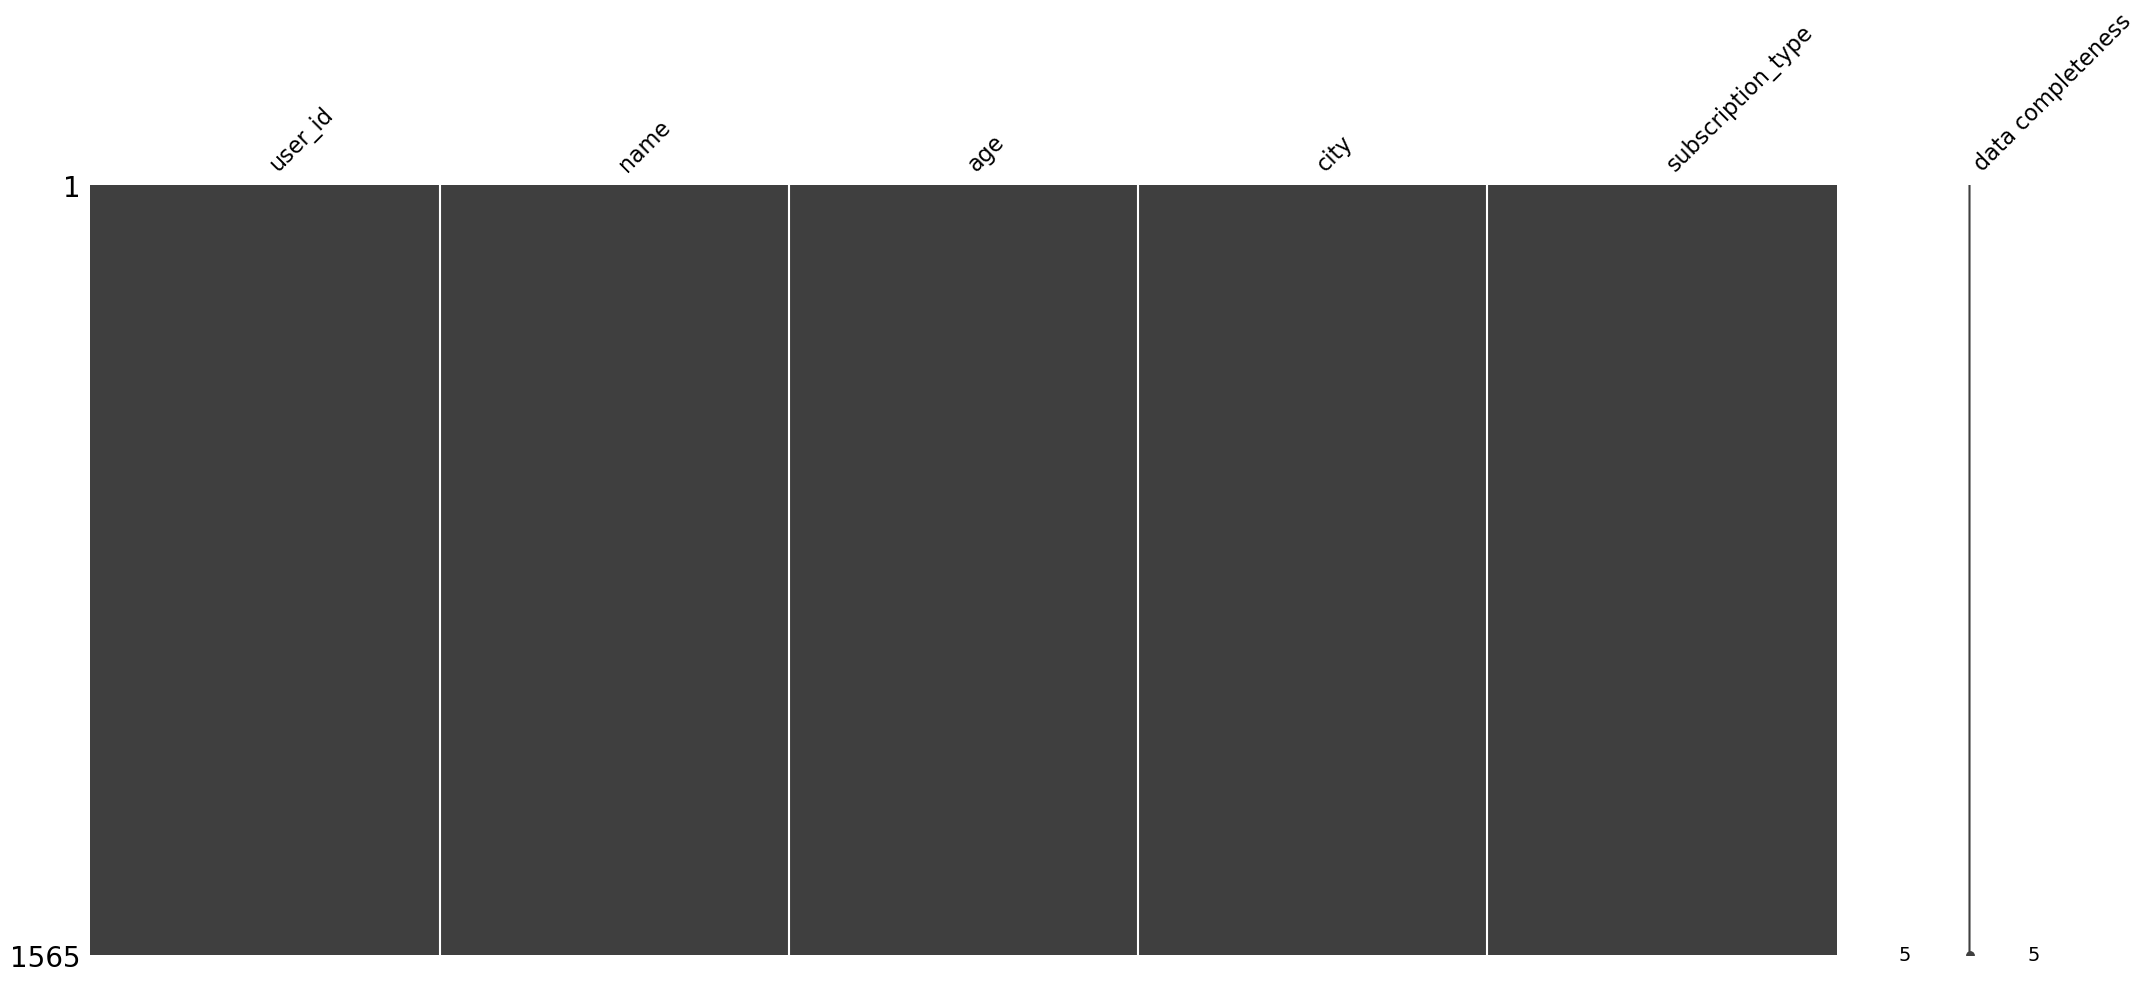

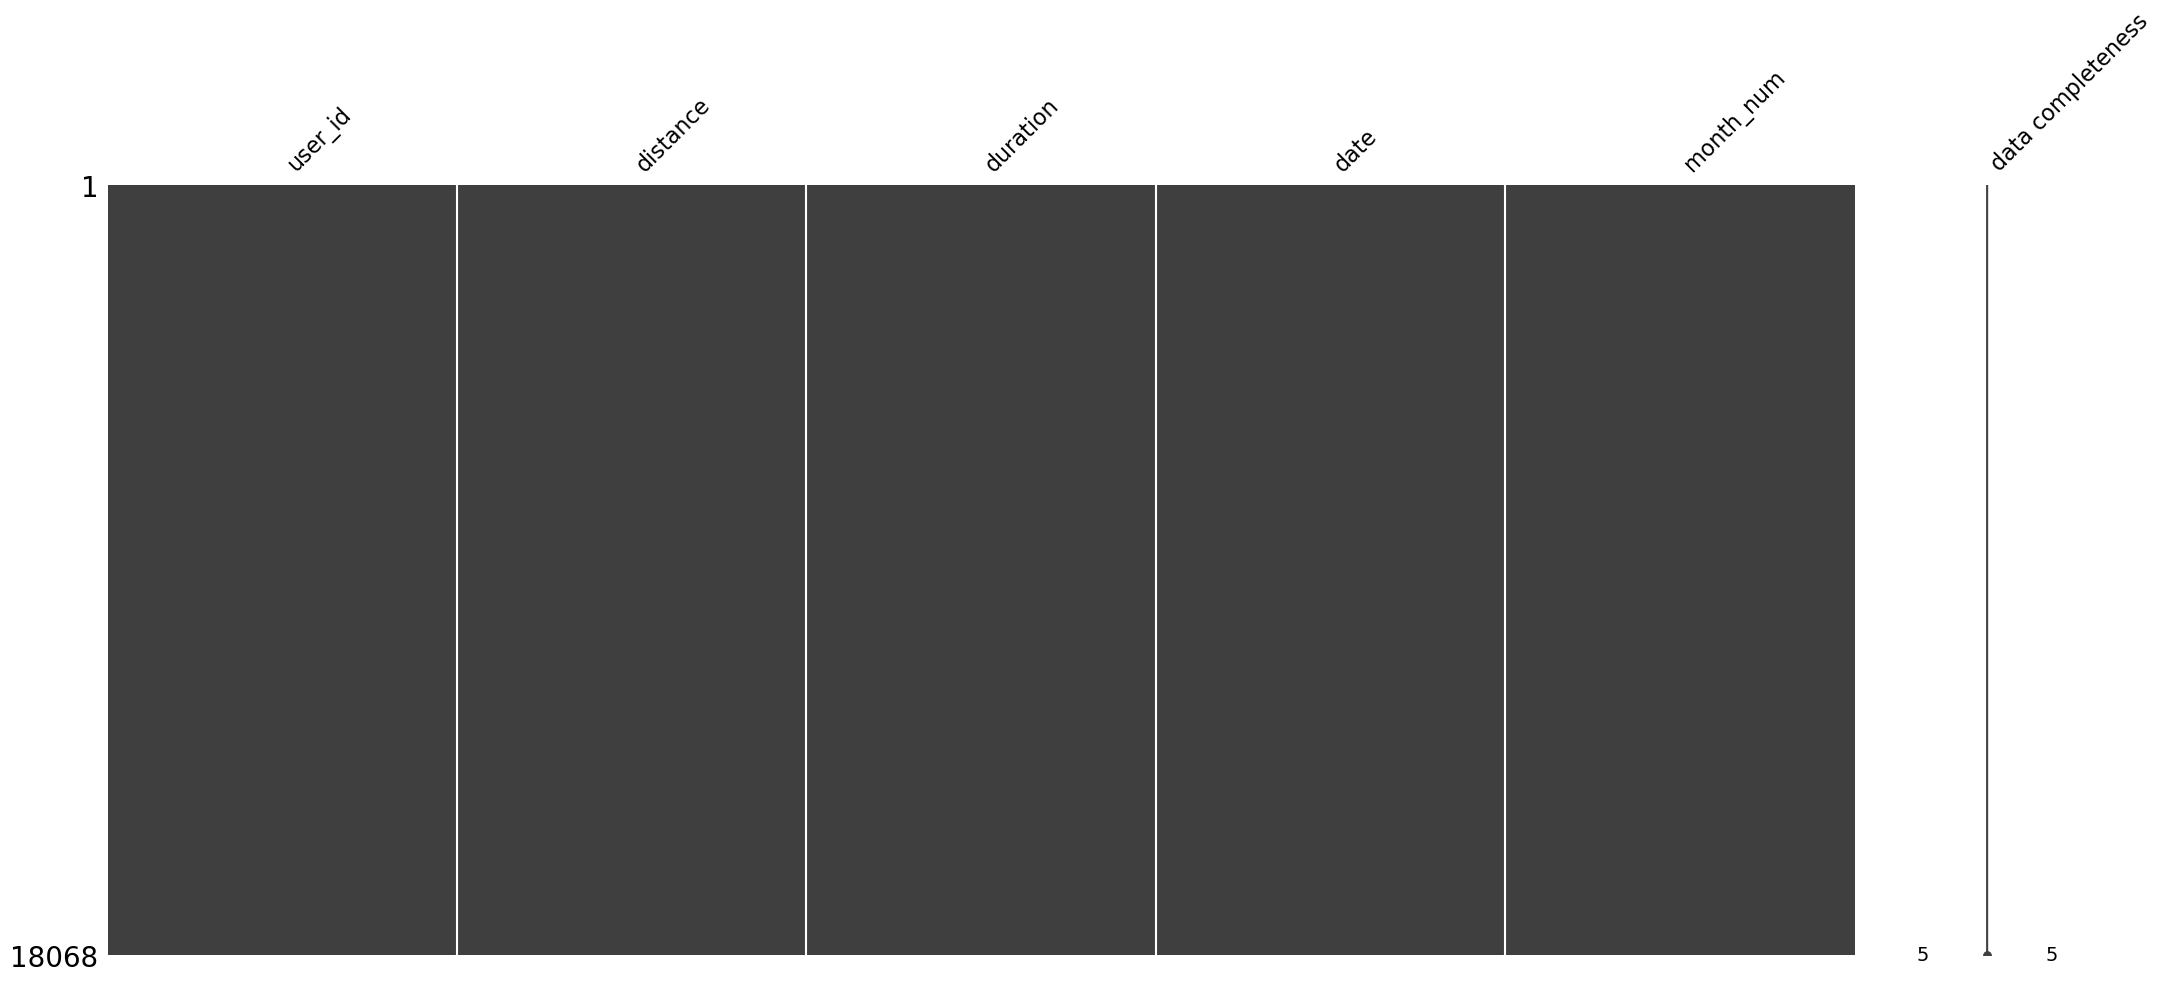

In [14]:
# визуализируем целостность данных
msno.matrix(df_users, labels=True)
msno.matrix(df_rides, labels=True)
plt.show()

Мы убедились в целостности данных, однако, к сожалению, данный факт не гарантирует отсутствие дубликатов. Проверим датафреймы `df_users` и `df_rides` на предмет наличия явных и неявных дубликатов.

In [15]:
# проверим столбцы на явные дубликаты
df_users.duplicated().sum()

31

In [16]:
# ознакомимся с выявленными дубликатами
df_users[df_users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Как можно наблюдать, последние 31 вхождение дублирует ранние записи о пользователях. Учитывая разброс номеров столбца `user_id`, трудно однозначно локализовать период дублирования значений, однако наличие дубликатов - повод для дополнительного анализа и составления баг-репорта.

Здесь и далее дубликаты нам не потребуются, поэтому удалим их.

In [17]:
# удалим явные дубликаты в столбце
df_users = df_users.drop_duplicates()

# проверим успешное удаление явных дубликатов
df_users.duplicated().sum()

0

In [18]:
# проверим столбцы на явные дубликаты
df_rides.duplicated().sum()

0

В отличие от датафрейма `df_users`, в датафрейме `df_rides` явные дубликаты не обнаружены. 

После проверки на явные дубликаты требуется удостовериться в отсутствии неявных.

In [19]:
# рассмотрим количество уникальных значений в столбцах датафрейма "df_users"
df_users[['user_id', 'name', 'city', 'subscription_type']].nunique()

user_id              1534
name                  194
city                    8
subscription_type       2
dtype: int64

Количство уникальных значений в столбцах датафрейма `df_users` выглядит правдоподобно: количество уникальных идентификаторов соответствует их количеству после удаления явных дубликатов, а типы подписок соответствуют тарифному плану в датафрейме `df_subscriptions`. Рассмотрим подробнее столбцы `name` и `city`.

In [20]:
# рассмотрим количество уникальных значений в столбце "name" датафрейма "df_users"
df_users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [21]:
# дополним уникальные значения столбца их частотностью
df_users['name'].value_counts().head(25)

name
Анна          22
Мария         22
Александр     17
Дмитрий       17
Никита        16
Кира          15
Иван          15
Ксения        14
Регина        13
Вячеслав      13
Ян            13
Вероника      13
Тамара        13
Степан        13
Руслан        12
Вадим         12
Владислава    12
Михаил        12
Кирилл        12
Одиссей       12
Алексей       12
Данила        11
Егор          11
Святослав     11
Алла          11
Name: count, dtype: int64

In [22]:
# рассмотрим количество уникальных значений в столбце "city" датафрейма "df_users"
df_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

На основе уникальных значений столбцов `name` и `city` датафрейма `df_users` неявных дубликатов не выявлено, однако вызывает подозрительная частотность имени Одиссей (рядом с именем Алексей). Данное имя представлено с такой же частотой, что и имена Кирилл, Михаил и Руслан. Возможно, имя Одиссей - результат автозаполнения по схожести с именем Алексей. Такое значение ставит под сомнение реальность имен пользователей, что при дополнительном исследовании с учетом имен может поставить такое исследование под сомнение, однако данные параметры не релевантны для текущего исследования. По этой же причине мы также опустим наличие альтернативных имен типа Наталья - Наталия - Наташа в датафрейме. На качество данных для дальнейшего исследования этот аспект не влияет.

Анализ датафрейма `df_users` на предмет неявных дублкатов не имеет смылса ввиду каличественных данных датафрейма.

В качестве промежуточного вывода к данному этапу следует отметить общую готовность данных к исследовательскому анализу. В целом данные не демонстрируют пропусков, а дубликаты наблюдались только в датафрейме `df_users` и впоследствии устранены. Наименование столбцов не нарушает общепринятый подход. Наличие неявных дубликатов в именах пользователей и странная частотность отдельных знанчений не нарушают репрезентативность данных для текущих задач исследования. Теперь можно приступать к исследовательскому анализу данных.

#### Шаг 3. Исследовательский анализ данных

На данном этапе нам необходимо предоставить статистическое описание располагаемых данных с указанием наиболее выжных для исследования аспектов: частота пользователей из различных городов, соотношений пользователей с подпиской и без, средний возраст пользователей, а также их среднее расстояние и длительность при использовании сервиса.

Для каждой метрики создадим таблицу частот с визуализацией. Начнем с оценки частоты пользователей из разных городов.

##### 3.1. Города пользователей сервиса

In [23]:
# построим таблицу по частоте городов пользователей сервиса
df_users['city'].value_counts().reset_index(drop=False)

,city,count
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


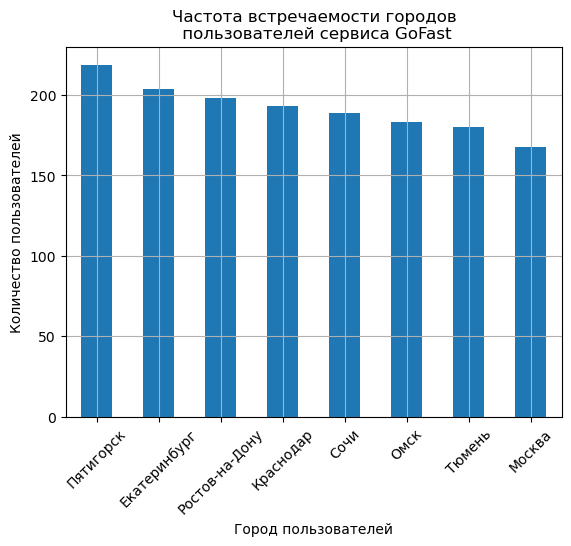

In [24]:
# дополним таблицу столбчатой диаграммой
df_users['city'].value_counts().plot(
    kind = 'bar',
    title = 'Частота встречаемости городов\n пользователей сервиса GoFast',
    xlabel = 'Город пользователей',
    ylabel = 'Количество пользователей',
    grid = True,
    rot = 45,
)
plt.show()

По данны выше мы видим, что сервис распространен в 8-ми городах (включая столицу), однако наибольшее распространение сервис получил в южных городах РФ (Пятигорск, Ростов-на-Дону, Краснодар). Географическим исключением здесь выступает Екатеринбург. Такая географическая корреляция может быть связана с продолжительным бесснежным сезоном, что характерно по сравнению с Москвой или Тюменью.

##### 3.2. Пользователи с подпиской и без подписки

In [25]:
# построим таблицу по числу пользователей с подпиской и без подписки
df_users_grouped = df_users.groupby('subscription_type')['user_id'].count().reset_index(drop=False)

# рассчитаем доли в процентах и добавим в датафрейм
df_users_grouped['share'] = (df_users_grouped['user_id'] / df_users_grouped['user_id'].sum()) * 100
df_users_grouped

,subscription_type,user_id,share
0,free,835,54.432855
1,ultra,699,45.567145


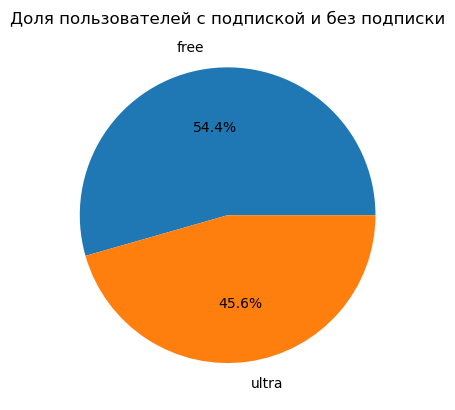

In [26]:
# дополним таблицу круговой диаграммой
names = df_users_grouped['subscription_type']
values = df_users_grouped['share']
plt.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%')
plt.title('Доля пользователей с подпиской и без подписки')
plt.show()

Как мы видим соотношение пользоватлей с подпиской и без подписки соответствует примерно 45% против 55%, а именно 699 против 835 из 1534. Достаточно хороший показатель доли пользователей с подпиской, что свидетельствует о добротной бизнес-модели.

##### 3.3. Возраст пользователей

In [27]:
# построим таблицу частот по возрасту пользователей и их доли
df_users.groupby('age')['user_id'].count().reset_index(drop=False)

,age,user_id
0,12,4
1,13,8
2,14,9
3,15,13
4,16,19
5,17,26
6,18,46
7,19,47
8,20,71
9,21,93


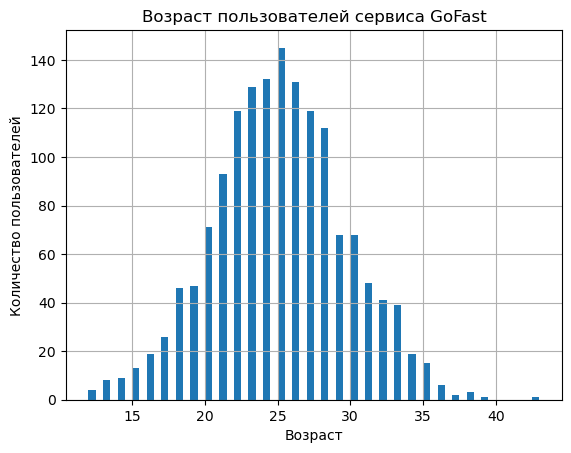

In [28]:
# дополним таблицу гистограммой частот
df_users['age'].plot(
    kind = 'hist', 
    bins = 62,
    title = 'Возраст пользователей сервиса GoFast',
    xlabel = 'Возраст',
    ylabel = 'Количество пользователей',
    grid = True
)
plt.show()

Как мы видим возрастной диапазон пользователей сервиса составляет 12 - 43 года. Примечательно, что возраст пользователей распределен нормально при неоднородной платежеспособности. Пользователи от 20 до 30 лет составляют целевую аудиторию сервиса, составляя больше половины всех пользователей.

##### 3.4. Среднее расстояние пользователя за одну поездку

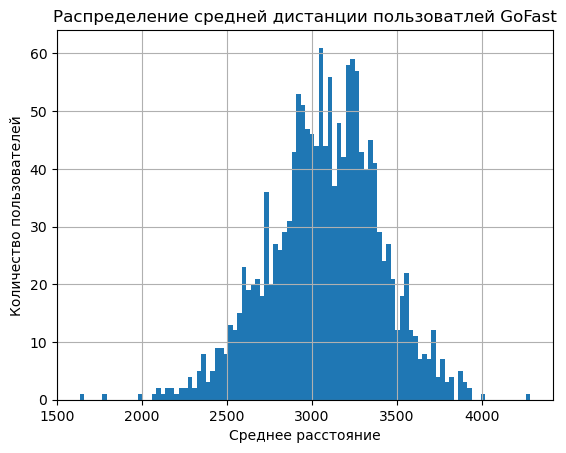

In [29]:
# построим таблицу по средней дистанции на пользователя и распределим ее на гистограмме
df_rides.groupby('user_id')['distance'].mean().reset_index(drop=False)['distance'].plot(
    kind = 'hist', 
    bins = 100,
    title = 'Распределение средней дистанции пользоватлей GoFast',
    xlabel = 'Среднее расстояние',
    ylabel = 'Количество пользователей',
    grid = True
)
plt.show()

In [30]:
# предоставим статистическое описание распределению средней дистанции на пользователя
df_rides.groupby('user_id')['distance'].mean().reset_index(drop=False)['distance'].describe()

count    1534.000000
mean     3077.296650
std       327.624403
min      1630.788427
25%      2882.505704
50%      3090.864050
75%      3293.325678
max      4287.519387
Name: distance, dtype: float64

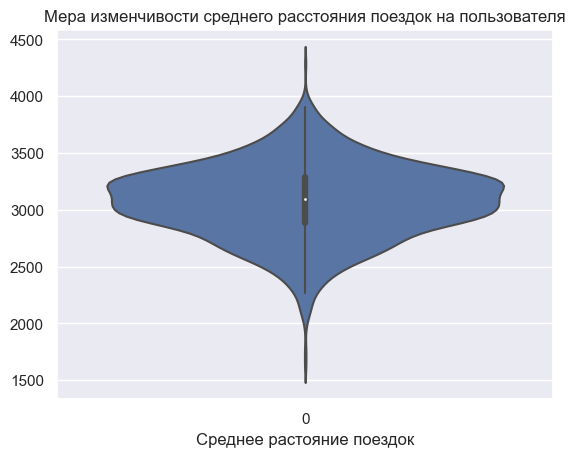

In [31]:
# дополним меры изменчивости визуализацией посредством скрипичной диаграммы
sns.set(style="darkgrid")
sns.violinplot(
    df_rides.groupby('user_id')['distance'].mean().reset_index(drop=False)['distance']
)
plt.title('Мера изменчивости среднего расстояния поездок на пользователя')
plt.xlabel('Среднее растояние поездок')
plt.show()

В среднем пользователь преодолевает за одну поездку от 2,8 до 3,2 км (в среднем - ~3 км). Расстояние одной поездки не превышает 4,5 км, а минимальная зафиксированная дистанция составляет 1,6 км. Стандартное отклонение в 0,3 км показывает низкую меру изменчивости выборки.

##### 3.5. Продолжительность поездок

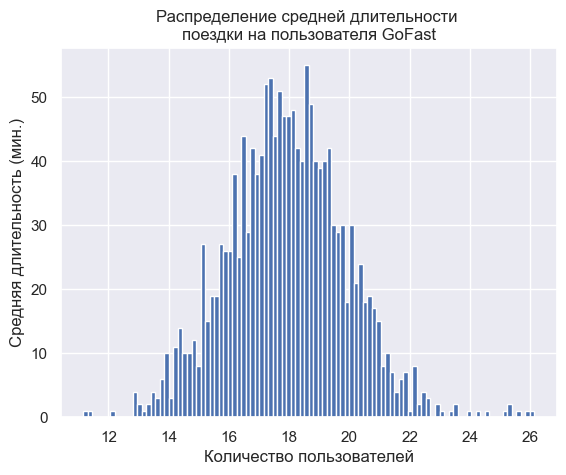

In [32]:
# построим сводную таблицу по средней длительности поездки на пользователя и распределим ее на гистограмме
df_rides.groupby('user_id')['duration'].mean().reset_index(drop=False)['duration'].plot(
    kind = 'hist', 
    bins = 100,
    title = 'Распределение средней длительности \nпоездки на пользователя GoFast',
    xlabel = 'Количество пользователей',
    ylabel = 'Средняя длительность (мин.)',
    grid = True
)
plt.show()

In [33]:
# предоставим статистическое описание распределению средней длительности поездки на пользователя
df_rides.groupby('user_id')['duration'].mean().reset_index(drop=False)['duration'].describe()

count    1534.000000
mean       17.926440
std         1.971150
min        11.163431
25%        16.613880
50%        17.903937
75%        19.198581
max        26.136000
Name: duration, dtype: float64

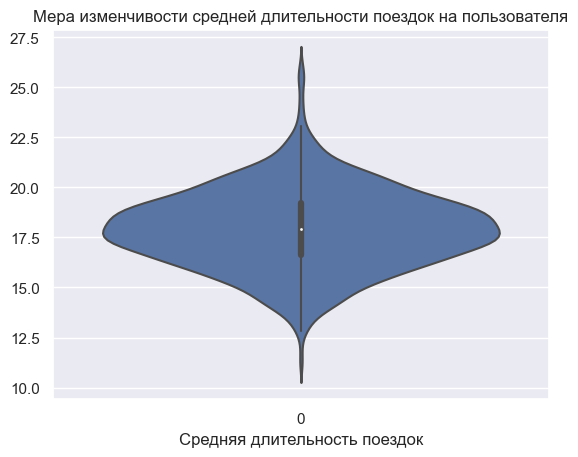

In [34]:
# дополним меры изменчивости визуализацией посредством скрипичной диаграммы
sns.set(style="darkgrid")
sns.violinplot(
    df_rides.groupby('user_id')['duration'].mean().reset_index(drop=False)['duration'],
)
plt.title('Мера изменчивости средней длительности поездок на пользователя')
plt.xlabel('Средняя длительность поездок')
plt.show()

В среднем пользователи тратят от 16 до 19 мин. (средняя длительность - 17,5 мин.). Также немаловажно то, что сессия вообще не превышает 27 мин. и длится не менее 11 мин. Стандартное отклонение в 1,9 мин. показывает низкую изменчивость выборки.

В качестве промежуточного вывода на основе выявленных отчетных таблиц по параметрам города, тарификации, возраста пользователей, а также их поездок с учетом расстояния и затраченного времени, мы можем составить предварительный портрет пользователя сервиса GoFast:
1) житель южных городов (Пятигорск, Сочи, Краснодар),
2) возраст - от 20 до 30 лет,
3) пользователь оформил подписку Ultra,
4) проезжает на самокате сервиса около 3 км,
5) среденяя продолжительность поездки - 17 мин.

#### Шаг 4. Объединение данных

##### 4.1. Общий датафрейм `fast_go_df`
Для дальнейшего анализа и проверки гипотез нам потребуется объединить датафреймы в несколько готовых датафреймов в соответствии с фокусом на конкретную пользовательскую группу, а именно: 

1) все пользователи, 
2) пользователи с подпиской, 
3) пользователи без подписки.

Для этого объединим датафреймы в один на основе `user_id` и `subscription_type` в качестве ключа.

In [35]:
# объединим датафремы в единый датафрейм
user_rides_df = df_users.merge(df_rides, how='left', on='user_id')
fast_go_df = user_rides_df.merge(df_subscriptions, how='left', on='subscription_type')
fast_go_df

,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Объединение датафреймов в один прошла успешно. Данные сохранены, о чем свидетельствует число строк (18068), что соответствует размерности наиболее крупного исходного датафрейма `df_rides`.

##### 4.2. Датафреймы по срезам пользователей `ultra_users_df` и `free_users_df`
Однако далеко не все исследовательские вопросы касаются всех пользователей сервиса - часто нас интересуют именно группы пользователей. С целью подготовить датафреймы для таких выборок с подготовим 2 побочных датафрейма со срезом пользователей с подпиской и без нее.

In [36]:
# создадим датафрейм пользователей с подпиской
ultra_users_df = fast_go_df[fast_go_df['subscription_type'] == 'ultra']
ultra_users_df

,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [37]:
# создадим датафрейм пользователей без подписки
free_users_df = fast_go_df[fast_go_df['subscription_type'] == 'free']
free_users_df

,user_id,name,age,city,subscription_type,distance,duration,date,month_num,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


##### 4.3 Визуализиция поездок пользователей обеих категорий

Подготовив датафреймы с данными о поездках пользователей с подпиской и без, мы можем проанализировать детали поездок у обеих групп. Для начала сделаем сводные таблицы для каждой группы.

In [38]:
# создадим сводную таблицу по пользователям с подпиской
ultra_pivot = pd.pivot_table(
    data = ultra_users_df,
    index = ['user_id'],
    aggfunc = {'distance':'median', 'duration':'median'}    
)
ultra_pivot = ultra_pivot.reset_index(drop=False)
ultra_pivot

,user_id,distance,duration
0,1,2806.504429,16.233505
1,2,3105.086678,18.779128
2,3,2858.693148,19.835873
3,4,3373.276987,20.723324
4,5,3244.021903,14.904990
...,...,...,...
694,695,3169.995523,16.886805
695,696,2975.351390,17.751506
696,697,3237.170107,19.289114
697,698,3060.816044,18.964001


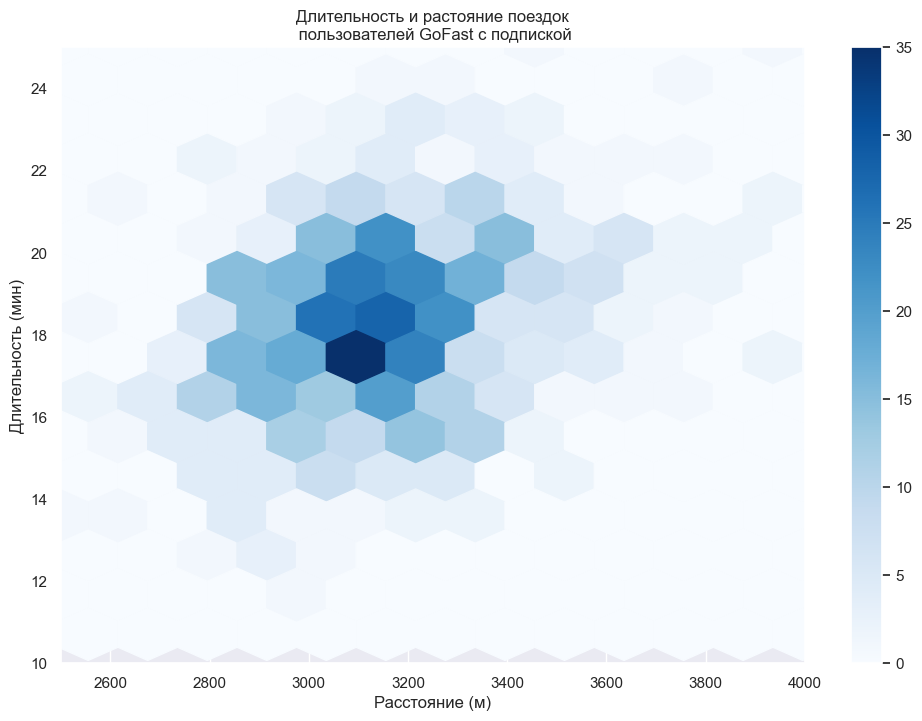

In [39]:
# визуализируем
ultra_pivot.plot.hexbin(
    x = 'distance',
    y = 'duration',
    figsize = (12, 8),
    grid = True,
    gridsize = (25, 10),
    cmap = 'Blues',
    title = 'Длительность и растояние поездок\n пользователей GoFast с подпиской',
    xlabel = 'Расстояние (м)',
    ylabel = 'Длительность (мин)',
    xlim = [2500, 4000],
    ylim = [10, 25]
)
plt.show()

Как мы видим средняя длительность и расстояние поездок пользователей сервиса GoFast с подпиской имеет слабый разброс, но наибольшее скопление значений наблюдается в секторе от 16 до 22 мин. при расстоянии от 2,8 до 3,4 км. Остальные случаи встречаются реже.

Рассмотрим аналогичный аспект у пользователей сервиса без подписки.

In [40]:
# создадим сводную таблицу по пользователям без подписки
free_pivot = pd.pivot_table(
    data = free_users_df,
    index = ['user_id'],
    aggfunc = {'distance':'median', 'duration':'median'}    
)
free_pivot = free_pivot.reset_index(drop=False)
free_pivot

,user_id,distance,duration
0,700,3015.965321,15.616269
1,701,3436.950905,15.137141
2,702,3387.284767,19.228790
3,703,2547.626997,10.859179
4,704,3261.700990,17.509964
...,...,...,...
830,1530,2724.331740,16.207316
831,1531,2999.913238,18.308701
832,1532,2615.477834,14.846434
833,1533,2965.546552,19.772353


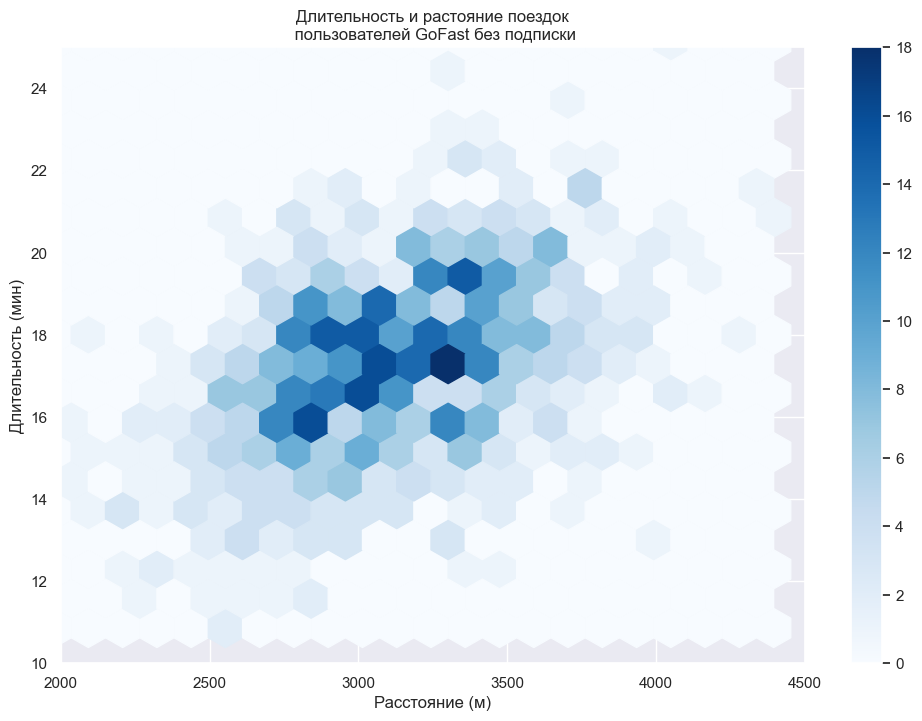

In [41]:
# визуализируем
free_pivot.plot.hexbin(
    x = 'distance',
    y = 'duration',
    figsize = (12, 8),
    grid = True,
    gridsize = (25, 10),
    cmap = 'Blues',
    title = 'Длительность и растояние поездок\n пользователей GoFast без подписки',
    xlabel = 'Расстояние (м)',
    ylabel = 'Длительность (мин)',
    xlim = [2000, 4500],
    ylim = [10, 25]
)
plt.show()

Как мы видим средняя длительность и расстояние поездок пользователей сервиса GoFast без подписки имеет более выраженный разброс, нежели у пользователей с  подпиской. Наибольшее скопление значений с трудом локализуется в конкретном секторе, скорее отражая естественную зависимость времени от дистанции. Однако мы можем выделить сектор с 14 до 20 мин при расстоянии с 2,5 до 3,5 км. Остальные случаи встречаются реже, но они не такие редкие, как у пользователей с подпиской.

Визуализируем контраст параметров поездок пользователей с подпиской и без.

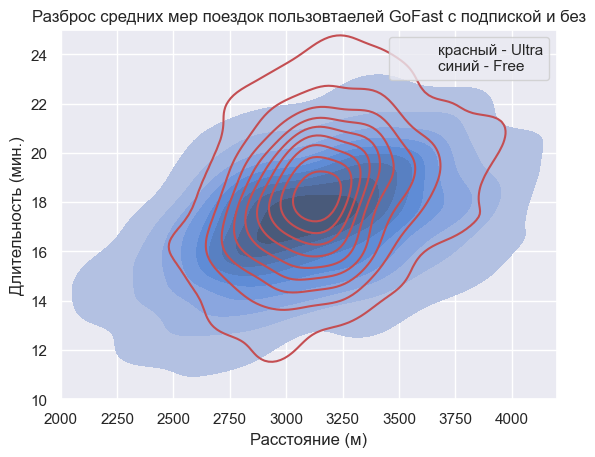

In [42]:
# построим два графика, отражающих контраст разброса мер изменчивости поездок пользователей с подпиской и без
fig1 = sns.kdeplot(
    data = ultra_pivot,
    x = 'distance',
    y = 'duration',
    fill = False,
    color='r'
)

fig2 = sns.kdeplot(
    data = free_pivot,
    x = 'distance',
    y = 'duration',
    fill = True,
    color='b'
)
plt.xlim(2000, 4200)
plt.ylim(10, 25)
plt.title('Разброс средних мер поездок пользовтаелей GoFast с подпиской и без')
plt.xlabel('Расстояние (м)')
plt.ylabel('Длительность (мин.)')
plt.legend(['красный - Ultra\nсиний - Free'])
plt.show()

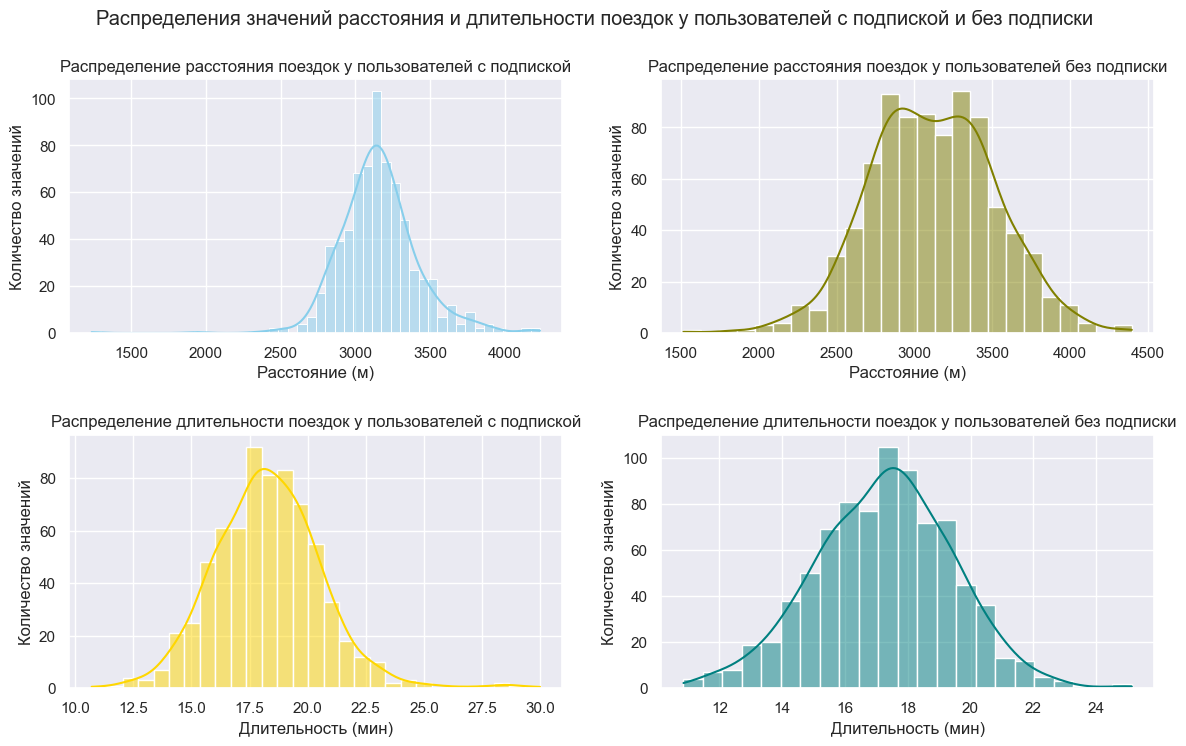

In [43]:
# дополним разброс столбчатыми диаграммами с распределениями по расстоянию и длительности поездок у пользователей
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

sns.histplot(data=ultra_pivot, x='distance', kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].title.set_text('Распределение расстояния поездок у пользователей с подпиской')
axs[0, 0].set_xlabel('Расстояние (м)')
axs[0, 0].set_ylabel('Количество значений')

sns.histplot(data=free_pivot, x='distance', kde=True, color="olive", ax=axs[0, 1])
axs[0, 1].title.set_text('Распределение расстояния поездок у пользователей без подписки')
axs[0, 1].set_xlabel('Расстояние (м)')
axs[0, 1].set_ylabel('Количество значений')

sns.histplot(data=ultra_pivot, x='duration', kde=True, color="gold", ax=axs[1, 0])
axs[1, 0].title.set_text('Распределение длительности поездок у пользователей с подпиской')
axs[1, 0].set_xlabel('Длительность (мин)')
axs[1, 0].set_ylabel('Количество значений')

sns.histplot(data=free_pivot, x='duration', kde=True, color="teal", ax=axs[1, 1])
axs[1, 1].title.set_text('Распределение длительности поездок у пользователей без подписки')
axs[1, 1].set_xlabel('Длительность (мин)')
axs[1, 1].set_ylabel('Количество значений')

plt.suptitle('Распределения значений расстояния и длительности поездок у пользователей с подпиской и без подписки')
plt.subplots_adjust(bottom=0.01, hspace=0.4)

plt.show()

Как мы видим пользователи с подпиской используют сервис активнее, чем пользователи без подписки. Мера изменчивости поездок у пользователей с подпиской меньше и стремится вверх, нежели у пользователей без подписки, что явно отражает больший спрос у данной группы. Пользователи без подписки, наоборот, демонстрируют большую изменчивость в использовании сервиса: наблюдается тренд на уменьшение параметра расстояние/длительность поездки, что говорит о хаотичности спроса у данной группы. 

Отдельно требует внимания и соотношение длительности и расстояния в качестве показателя скорости передвижения при использовании сервиса. Так, мера изменчивости у пользователей с подпиской растягивается больше по оси длительности, пока у пользователей без подписки изменчивость расшиерна по оси расстояния. Такая изменчивость свидетельствует о разных пользовательских поведениях у разных групп: пользователи с подпиской не имеют тенденцию к спешке до пункта назанчения, в то время как пользователи без подписки имеют тенденцию к увеличению скорости, что опять-таки отражает бизнес-модель подписки, а именно: разность стоимости минут у двух групп пользователей.

В качестве вывода по данному шагу стоит отметить разное поведение пользователей с подпиской и без подписки относительно использования сервиса: подписка успешно реализует бизнес-модель, стимулируя спрос у целевой аудитории, в то время как группа с меньшим спросом (меньшей заинтресованностью) демонстрирует меньшее постоянство спроса, что влечет за собой и больший разброс в парметрах поездок.

Теперь рассмотрим экономический аспект предоставленных данных.

#### Шаг 5. Подсчёт выручки

Подсчитаем вырочку, которую приносят пользователи GoFast. Для этого агрегируем данные из датафрейма `fast_go_df` по пользователеям.

In [44]:
# создадим сводную таблицу с агрегацией данных по пользователям
fast_go_pivot = pd.pivot_table(
    data = fast_go_df,
    index = ['user_id', 'month_num'],
    values = ['distance', 'date', 'duration', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'],
    aggfunc = {'distance':'sum', 
               'date':'count', 
               'duration':'sum', 
               'minute_price':'mean',
               'start_ride_price':'mean',
               'subscription_fee':'mean'}
)

# переназначим индексацию, чтобы избавиться от мультиндекса
fast_go_pivot = fast_go_pivot.reset_index(drop=False)

# округлим значения с продолжительностью поездок
fast_go_pivot['duration'] = fast_go_pivot['duration'].round(2)

fast_go_pivot

,user_id,month_num,date,distance,duration,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,41.42,6,0,199
1,1,4,1,754.159807,6.23,6,0,199
2,1,8,2,6723.470560,44.78,6,0,199
3,1,10,2,5809.911100,31.58,6,0,199
4,1,11,3,7003.499363,53.40,6,0,199
...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,24.81,8,50,0
11327,1534,8,2,7622.453034,47.21,8,50,0
11328,1534,9,1,4928.173852,22.56,8,50,0
11329,1534,11,4,13350.015305,76.34,8,50,0


Чтобы верно посчитать выручку на каждого пользователя при наличии подписки и без нее, нам понадобится добавить столбец с выручкой, которая подсчитывается через функцию, учитывающую наличие/отсутствие подписики и условия обслуживания при той или иной модели ценообразования.

In [45]:
# объявим функцию для подсчета выручки в зависимости от подписки пользователя
def revenue_culc(row):
    result = (row['start_ride_price'] * row['date']) + (row['minute_price'] * row['duration']) + row['subscription_fee']
    return np.ceil(result)

# применим функцию к ячейкам нового столбца
fast_go_pivot['revenue'] = fast_go_pivot.apply(revenue_culc, axis = 1)

fast_go_pivot

,user_id,month_num,date,distance,duration,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,41.42,6,0,199,448.0
1,1,4,1,754.159807,6.23,6,0,199,237.0
2,1,8,2,6723.470560,44.78,6,0,199,468.0
3,1,10,2,5809.911100,31.58,6,0,199,389.0
4,1,11,3,7003.499363,53.40,6,0,199,520.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,24.81,8,50,0,299.0
11327,1534,8,2,7622.453034,47.21,8,50,0,478.0
11328,1534,9,1,4928.173852,22.56,8,50,0,231.0
11329,1534,11,4,13350.015305,76.34,8,50,0,811.0


In [46]:
# высчитаем итоговую вырочку
total_revenue = fast_go_pivot['revenue'].sum()

# высчитаем вырочку от пользователей с подпиской
ultra_revenue = fast_go_pivot[fast_go_pivot['subscription_fee'] == 199]['revenue'].sum()

# высчитаем вырочку от пользователей без подписки
free_revenue = fast_go_pivot[fast_go_pivot['subscription_fee'] == 0]['revenue'].sum()

f'Общая выручка:{total_revenue}  Выручка (Ultra):{ultra_revenue}  Выручка (Free):{free_revenue}'

'Общая выручка:3818444.0  Выручка (Ultra):1627438.0  Выручка (Free):2191006.0'

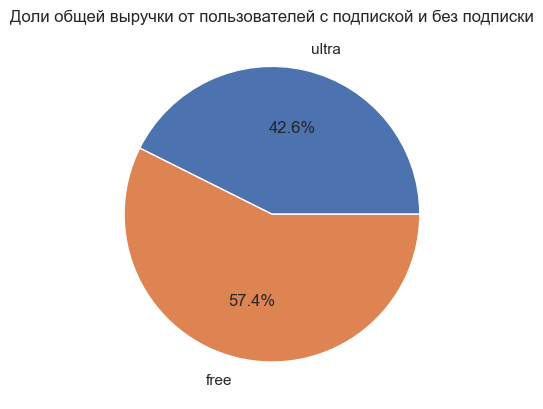

In [47]:
# дополним таблицу круговой диаграммой
names = ['ultra', 'free']
values = [ultra_revenue, free_revenue]
plt.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%')
plt.title('Доли общей выручки от пользователей с подпиской и без подписки')
plt.show()

Как мы видим, сервис успешно реализует бизнес-модель, принося прибыль в 3,8 млн. Из них 2,2 млн (57,4%) приходятся на пользователей без подписки, в то время как пользователи с подпиской принесли 1,6 млн (42,6%). Несмотря на то, что подписка снижает прибыль, потенциально возможную соразмерно пользователям без подписки, ее основной целью служит стабильность спроса, что мы и можем наблюдать на предыдущем шаге исследования.

#### Шаг 6. Проверка гипотез

Полученные датасеты представляют ценность не только для исследовательского анализа с целью выявить общие тренды и закономерности пользователей, но и провести статистическое тестирование данных пользователей для развития продуктовых метрик и проведения успешных маркетинговых кампаний.


Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

##### 6.1. t-тест длительности пользовательских сессий

Во-первых, если мы имеем данные о поездках пользователей с разной тарификацией, будет полезно выяснить, тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки. Проверим гипотезу, действительно ли пользователи с подпиской «выгоднее» для компании.

Сформулируем гипотезы:
- Нулевая гипотеза: *время поездки пользователей с подпиской = время поездки пользователей без подписки*.
- Алтернативная гипотеза: *время поездки пользователей с подпиской > время поездки пользователей без подписки*.

Для проверки гипотезы воспользуемся t-тестом для двух отдельных выборок с правосторонней альтернативной гипотезой. Для такого теста нам понадобится выборки генеральных совокупностей, однако сначала проверим дисперсии ГС, поскольку такой тест требует схожих дисперсий для коректного теста.

In [48]:
# высчитаем дисперсию для ГС с подпиской
ultra_pop = ultra_users_df['duration']
np.var(ultra_pop)

31.042946010919152

In [49]:
# высчитаем дисперсию для ГС без подписки
free_pop = free_users_df['duration']
np.var(free_pop)

40.02497415138631

Как мы видим, дисперсия ГС с подпиской меньше дисперсии ГС без подписки. Данное требование не критично - его можно невелировать увеличением выборки, поэтому возмем для выборки 50 значений.

In [50]:
# создадим выборки для двух ГС
ultra_sample = ultra_pop.sample(50)
free_sample = free_pop.sample(50)

Теперь, когда выборки готовы, можно приступать к тесту, однако следует также предусмотреть уровень статистической значимости. Возьмем `alpha` в 5% (0,05) и проведем тест.

In [51]:
# проведем t-тест для двух отдельных выборок
test_result = st.ttest_ind(ultra_sample, free_sample, alternative='greater')
test_result

TtestResult(statistic=0.8120210601722936, pvalue=0.2093737990525969, df=98.0)

Мы получили `p-value` в 0,28, что намного больше заданного уровня статистической значимости, что *не позволяет нам отвергнуть нулевую гипотезу*.

##### 6.2. t-тест среднего расстояния пользователей с подпиской

Продакт-менеджеры считают, что расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим эту гипотезу на среднем расстояния пользователей с подпиской.

Для проверки такой гипотезы нам понадобится t-тест с одной выборкой и двусторонней альтернативной гипотезой. Сами гипотезы сформулируем так: 
- Нулевая гипотеза: *среднее расстояние пользователей с подпиской = 3130 м*.
- Альтернативная гипотеза: *среднее расстояние пользователей с подпиской != 3130 м*.

Для ГС возмем выборку в 30 записей.

In [52]:
# создадим выборку для ГС
distance_sample = ultra_users_df['distance'].sample(30)

Возьмем `alpha` в 5% (0,05) и проведем тест.

In [53]:
# проведем t-тест для одной  выборки с двусторонней альт.гипотезой
expected_distance = 3130
test_result = st.ttest_1samp(distance_sample, expected_distance)
test_result

TtestResult(statistic=-0.5120772395323275, pvalue=0.6124748805187962, df=29)

Как мы видим, `p-value` при условии, что нулевая гипотеза верна, составляет 0,42. Это высокий показатель, и он намного выше уровня стат.значимости, поэтому *нулевую гипотезу мы не отвергаем*.

##### 6.3. t-тест средней помесячной выручки на пользователей с подпиской и без подписки

Предыдущие тесты нам демонстрируют, что скорее всего пользователи с подпиской приносят больше дохода, нежели пользователи без подписки. Возьмем данное утверждение в гипотезу и проведем по ней тест.

Для проверки такой гипотезы нам потребуется t-тест с двумя независимыми выборками. Гипотезы сформулируем так:
- Нулевая гипотеза: *средняя выручка пользователей с подпиской = средней выручке пользователей без подписки*.
- Альтернативная гипотеза: *средняя выручка пользователей с подпиской != средней выручке пользователей без подписки*.

Дальнейшая подготовка к тестированию требует создания ГС для каждой выборки, а также сравнение их дисперсий.

In [54]:
# высчитаем дисперсию для ГС с подпиской
ultra_pop_revenue = fast_go_pivot[fast_go_pivot['subscription_fee'] != 0]['revenue']
np.var(ultra_pop_revenue)

7461.213142107772

In [55]:
# высчитаем дисперсию для ГС без подписки
free_pop_revenue = fast_go_pivot[fast_go_pivot['subscription_fee'] == 0]['revenue']
np.var(free_pop_revenue)

32580.606914308933

Как мы видим, дисперсия ГС с подпиской меньше дисперсии ГС без подписки в разы, что может сильно исказить тест, поэтому в парметре теста `equal_var` укажем `False`, также увеличим выборку до 50 записей.

In [56]:
# создадим выборки для двух ГС
ultra_revenue_sample = ultra_pop_revenue.sample(50)
free_revenue_sample = free_pop_revenue.sample(50)

Возьмем `alpha` в 5% (0,05) и проведем тест.

In [57]:
# проведем t-тест для двух отдельных выборок
test_result = st.ttest_ind(ultra_revenue_sample, free_revenue_sample, equal_var = False)
test_result

TtestResult(statistic=0.9049914924734169, pvalue=0.36856120745996634, df=70.2955756574493)

P-value в результате теста составляет 0,007, что меньше уровня стат.значимости, а потому мы *нулевую гипотезу отвергаем и принимает альтернативную*.

##### 6.4. t-тест среднего количества обращений в тех.поддержку

Если представить ситуацию, при которой техническая команда сервиса обновила сервера мобильного приложения с рассчетом значительного снижения количества обращений в техподдержку, то нам бы понадобился дополнительный датасет с количеством обращений каждого пользователя до и после обновления серверов. Имя такие данные мы смогли бы провести t-тест для двух парных выборок. Можно было сформулировать гипотезы таким образом:

- Нулевая гипотеза: *средняя количество обращений в тех.поддержку до обновления = среднему количеству обращений после обновления*.
- Альтернативная гипотеза: *средняя количество обращений в тех.поддержку до обновления > среднему количеству обращений после обновления*.

Сам код t-теста выглядел бы так: `ttest_rel(before_sample, after_sample, alternative='greater')`

В качестве вывода для данного этапа мы можем отметить результаты проведенных тестов:
- гипотеза о том, что длительность сессий пользователей с подпиской и без подписки одинакова, имеет высокую вероятность отражать действительное соотношение длительности поездок пользователей;
- гипотеза о том, что среднее расстояние поездок у пользователей с подпиской равно 3130 м, имеет высокую вероятность соответствовать действительности;
- гипотеза о том, что средняя помесячная выручка на пользователей с подпиской и без подписки одинакова, маловероятна, поэтому разная тарификация у пользователей действительно дает отличный доход, что подтверждается и исследованиями ГС на предыдущем этапе.

#### Шаг 7. Распределения

##### 7.1. Минимальное количество промокодов

Располагаемые данные также полезны и для выявления вероятностей при заданных условиях. Так, отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Отдел маркетинга хочет выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.

Чтобы выяснить минимальное количество промокодов для вероятности не выполнить план составляла 5%, нам потребуется построить биноминальное распределение.

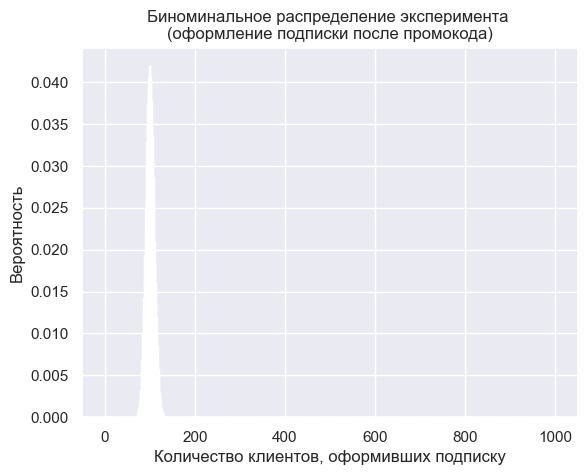

In [58]:
# построим биноминальное распределение
n = 1000 # нужно как минимум 100 * 10 = 1000 промокодов
p = 0.1 # вероятность продлить подписку

distribution = []

for i in range(0, n+1):
    current_value = st.binom.pmf(i, n, p)
    distribution.append(current_value)
    
plt.bar(range(0, n + 1), distribution)
plt.title('Биноминальное распределение эксперимента \n(оформление подписки после промокода)')
plt.xlabel('Количество клиентов, оформивших подписку')
plt.ylabel('Вероятность')
plt.show()

Теперь, когда мы получили биноминальное распределение, апроксимируем его через нормальное распределение. Биноминальное распределение достаточно симметрично, поэтому апроксимация не исказит результат.

In [59]:
# апроксимируем биноминальное распределение нормальным
mu = n*p
sigma = sqrt(n*p*(1-p))

# нас интресует вероятность 5% - вероятность невыпонения плана
prob = 0.05

# построим апроксимирующее нормальное распределение
distr = st.norm(mu, sigma)

# найдем необходимое количество промокодов через функцию процентных значений
promo = distr.ppf(1-prob)

print('Нужно промокодов:', int(promo))

Нужно промокодов: 115


Таким образом, чтобы успешно справиться с задачей, отделу маркетинга необходимо разослать как минимум 115 промокодов.

##### 7.2. Вероятность открытия push-уведомлений

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Чтобы оценить вероятность того, что уведомление откроют не более 399500 пользователей, нам потребуется построить биноминальное распределение, однако такое количество будет считать проблематично. Апроксимируем биноминальное распределение нормальным и высчитаем верятность целового показателя пользователей.

In [60]:
# построим биноминальное распределение
n = 1000000
p = 0.4

mu = n*p
sigma = sqrt(n*p*(1-p))

distribution = st.norm(mu, sigma)

limit = 399500

result = distribution.cdf(limit)
result

0.15371708296369768

На основе биноминального распределения, апроксимированного нормальным, вероятность того, что не более 399 500 пользователей откроют push-уведомления, составляет около 15,37%.

#### Шаг 8. Общий вывод

#### Обзор данных
Для анализа и проведения t-тестов представлено 3 датасета с данными о пользователях и тарифах сервиса FastGo и поездах. Данные датасеты были загружены в следующие датафреймы:
+ df_users (id, имя, возраст, город, подписка) - 1565 записей
+ df_rides (id, длительность, расстояние, дата) - 18068 записей
+ df_subscriptions (подписка, стоимость за минуту, стоимость подписки, стоимость старта) - 2 записи

#### Методология

##### Предобработка данных
Датафреймы представляют достаточно целостные данные, требующие незначительные манипуляции на этапе предобработки. Пропуски отсутствуют, а дубликаты наблюдались только в датафрейме `df_users`. Из примечательного можно отметить наличие неявных дубликатов в именах пользователей, однако устранение такого вида дубликатов требует дополнительного исследования, выходящего за рамки актуальных целей. и странная частотность отдельных знанчений не нарушают репрезентативность данных для текущих задач исследования. Теперь можно приступать к исследовательскому анализу данных.

##### Исследовательский анализ данных
На данном этапе был проведен исследовательский анализ данных, включающий выявление частотности городов, возраст пользователей, распределение пользователей по подпискам, а также их средние показатели по поездкам (расстояние и время).Основываясь, на полученных результатах анализа, можно выделить следующие характерные для пользователей сервиса признаки: 
1) житель южных городов (Пятигорск, Сочи, Краснодар),
2) возраст - от 20 до 30 лет,
3) пользователь оформил подписку Ultra,
4) проезжает на самокате сервиса около 3 км,
5) среденяя продолжительность поездки - 17 мин.

##### Объединение данных
Для более подробного исследования ключевых показателей датафреймы были объединены в общий датафрейм, а также в отдельные датафреймы для пользователей с подпиской и без подписки. В дополнение к этому были добавлены столбцы с месяцами поездок, а также визуализация парметров поездок у двух групп пользователей.

##### Подсчет выручки
На данном этапе была подсчитана выручка от каждого пользователя как результат всех поездок, включая поминутную тарификацию, подписку и стоимость начала поездки. В дополнение была выявлена доля выручки от пользователей с подпиской и без подписки.
Анализ данных проходил в несколько этапов:

##### Проверка гипотез
На основе располагаемых данных были проверены гипотезы, поставленные продукт-менеджерами.

##### Построение распределений
На заключительном этапе были проанализированы задачи маркетологов по проведению промо-кампаний, что включает выявление минимального количества промокодов для успешного покрытия, а также оценка эффективности push-уведомлений.

#### Выводы
##### Поездки пользователей
Пользователи с подпиской используют сервис активнее, чем пользователи без подписки. Изменчивость поездок у пользователей с подпиской меньше и стремится к большим значениям, нежели у пользователей без подписки. Эта закономерность отражает больший спрос у группы с подпиской. Пользователи без подписки в свою очередь демонстрируют большую изменчивость в использовании сервиса. Распределение поездок у них формирует слабый тренд на уменьшение параметра расстояние/длительность поездки, что говорит о хаотичности спроса у данной группы.

Соотношение длительности и расстояния в качестве показателя скорости передвижения явно отражает разные пользовательские стратегии у обеих групп пользователей: изменчивости у пользователей с подпиской растягивается больше по оси длительности, пока у пользователей без подписки изменчивость расшиерна по оси расстояния. Такая изменчивость свидетельствует о разных пользовательских поведениях у разных групп: пользователи с подпиской не имеют тенденцию к спешке до пункта назанчения, в то время как пользователи без подписки имеют тенденцию к увеличению скорости.

##### Выручка
Общая выручка составляет 3.818.638 р. Из них 1.627.482 р. приходится на подписчиков, пока от пользователей без подписки выручка составляет 2.191.156 р. Подписка явно снижает в краткосрочной перспективе прибыль, однако повышает спрос, что увеличивает прибыль в долгосрочной перспективе.

##### Проверка гипотез
t-тесты подкрепили следующие гипотезы: 
1) длительность сессий пользователей с подпиской и без подписки одинакова;
2) среднее расстояние поездок у пользователей с подпиской равно 3130 м.

Гипотеза о том, что средняя помесячная выручка на пользователей с подпиской и без подписки одинакова, была отвергнута в пользу альтернативной гипотезы, что подтверждается анализом генеральной совокупности на предыдущих этапах.